# <center>NBA Players of the Week - Exploratory Visual Analysis</center>
<center>Created: 10/27/2018<br>
Latest Update: 10/28/2018<br>
By: Can Bekleyici - bekleydata.com<br></center>

## Table of Contents
- [Introduction](#intro)
- [Part I.a - Cleaning](#cleaning)
- [Part I.b - Assessment](#assessment)
- [Part II - Exploratory Data Analysis](#eda)
- [Part II.a - Univariate Exploration](#uni)
- [Part II.b - Bivariate Exploration](#bi)
- [Part II.c - Multivariate Exploration](#multi)

<a id='into'></a>
# Introduction
For this project, I explored a <a href="https://www.kaggle.com/jacobbaruch/nba-player-of-the-week">dataset from kaggle</a>, which contains every Player of the Week awarded between the NBA seasons 1984/85 and 2017/18. After shortly assessing and cleaning the dataset, I started exploring the data by using a variety of visualisations and techniques (as feature engineering). Upon finishing the exploration, I polished the visualizations for presentation purposes and turned them into slide decks.

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# read csv into data frame
df = pd.read_csv('NBA_player_of_the_week.csv')
df.head()

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value
0,29,NaN,"Apr 14, 1985",1978,6-5,Micheal Ray Richardson,PG,1984-1985,1985,6,New Jersey Nets,189,1.0
1,23,NaN,"Apr 7, 1985",1982,6-6,Derek Smith,SG,1984-1985,1985,2,Los Angeles Clippers,205,1.0
2,28,NaN,"Apr 1, 1985",1979,6-6,Calvin Natt,F,1984-1985,1985,5,Denver Nuggets,220,1.0
3,37,NaN,"Mar 24, 1985",1969,7-2,Kareem Abdul-Jabbar,C,1984-1985,1985,15,Los Angeles Lakers,225,1.0
4,28,NaN,"Mar 17, 1985",1978,6-9,Larry Bird,SF,1984-1985,1985,5,Boston Celtics,220,1.0


In [3]:
print(df.info())
print("Rows and Columns:   " + str(df.shape))
print("Duplicated Player names:   " + str(df.Player.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 13 columns):
Age                  1145 non-null int64
Conference           761 non-null object
Date                 1145 non-null object
Draft Year           1145 non-null int64
Height               1145 non-null object
Player               1145 non-null object
Position             1145 non-null object
Season               1145 non-null object
Season short         1145 non-null int64
Seasons in league    1145 non-null int64
Team                 1145 non-null object
Weight               1145 non-null object
Real_value           1145 non-null float64
dtypes: float64(1), int64(4), object(8)
memory usage: 116.4+ KB
None
Rows and Columns:   (1145, 13)
Duplicated Player names:   871


<a id='assessment'></a>
# I.a. Assessments

Upon a quick visual and programatic assessment, the following tidiness and quality issues of the dataset have been identified:
- `Conference` column contains NaN's
- `height` and `weight` colums are not nummeric
- `season` and `season short` columns are repetitive
- `date` column is not datetime formatted
- (Players are duplicated in the dataset (because they can be awarded multiple times))

<a id='cleaning'></a>
# I.b. Cleaning
- Fill NaN's with the value 'All'
- Convert height and weight values into metric and numeric
- Delete season column and convert date column into a datetime format
- Create a second dataframe with only containing unique players data for additional analysis

In [4]:
# replaces NaN's with 'All'
df['Conference'].replace(np.nan, "All", inplace=True)

In [5]:
# test
df.Conference.value_counts()

All     384
East    381
West    380
Name: Conference, dtype: int64

In [6]:
# standardize and convert weight to integers
df['Weight'] = [int(i.replace('kg', '')) * 2.205 if 'kg' in i else int(i) for i in df['Weight']]

# turn weight from pound to kilogram
df['Weight'] = (df['Weight'] / 2.205).round(0)

In [7]:
# convert heights into numeric with centimeter units
df['Height'] = [(int(i[0])*12*2.54 + int(i[1])*2.54) if 'cm' not in i[0] 
                else int(i[0].replace('cm', '')) for i in df['Height'].str.split('-')]

# round to next integers
df['Height'] = df['Height'].round(0)

In [8]:
# test Weight column
df['Weight'].sort_values(ascending=False).unique()

array([147., 141., 139., 131., 129., 127., 122., 121., 120., 118., 117.,
       116., 115., 114., 113., 112., 111., 110., 109., 107., 106., 105.,
       104., 103., 102., 101., 100.,  99.,  98.,  96.,  95.,  94.,  93.,
        91.,  90.,  89.,  88.,  87.,  86.,  85.,  84.,  83.,  82.,  81.,
        79.,  77.,  76.,  75.,  74.,  68.])

In [9]:
# test Height column
df['Height'].sort_values(ascending=False).unique()

array([229., 224., 221., 218., 216., 213., 211., 208., 206., 203., 201.,
       198., 196., 193., 191., 190., 188., 185., 183., 180., 178., 175.])

In [10]:
# drop season column
df.drop(columns=['Season'], axis=1, inplace=True)

In [11]:
# test
df.columns

Index(['Age', 'Conference', 'Date', 'Draft Year', 'Height', 'Player',
       'Position', 'Season short', 'Seasons in league', 'Team', 'Weight',
       'Real_value'],
      dtype='object')

In [12]:
# convert date column to a datetime format
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)

In [13]:
# test
df['Date'].dtype

dtype('<M8[ns]')

In [14]:
# create a second dataframe with only unique player data
df2 = df.groupby(['Player', 'Position', 'Draft Year']).size().reset_index(name='POTW Counts')
df2 = df2.merge(df.groupby(['Player'])['Age', 'Height', 'Weight'].median(), on='Player', how='inner')

In [15]:
# test
df2

,Player,Position,Draft Year,POTW Counts,Age,Height,Weight
0,Aaron McKie,G,1994,1,28.0,196.0,95.0
1,Adrian Dantley,SF,1976,1,30.0,196.0,94.0
2,Al Harrington,F,1998,1,29.0,206.0,111.0
3,Al Horford,FC,2007,3,28.0,208.0,111.0
4,Al Jefferson,FC,2004,7,27.0,208.0,131.0
5,Alex English,SF,1976,4,32.0,201.0,86.0
6,Allan Houston,G,1993,1,31.0,198.0,93.0
7,Allen Iverson,G,1996,23,28.0,183.0,75.0
8,Alonzo Mourning,C,1992,6,28.5,208.0,109.0
9,Alvin Robertson,SG,1984,3,24.0,190.0,84.0


In [16]:
# save the cleaned dataframes
df.to_csv('NBA_potw_clean.csv', index=False)
df2.to_csv('NBA_potw_clean2.csv', index=False)

<a id='eda'></a>
# II. Exploratory Data Analysis

This Part will focus heavily on visual data exploration and is divided into three stages. The first stage is the analysis of univariate relations in the datasets. The second stage is an extended bivariate exploration build on the first stage. The third stage of the analysis will explore multivariate relations from 3 different variables upwards. 

In [17]:
df = pd.read_csv('NBA_potw_clean.csv')
df2 = pd.read_csv('NBA_potw_clean2.csv')

<a id='uni'></a>
# II.a. Univariate Exploration

In this stage of the EDA, I would like to inspect to distributions in the ages, weights, and heights of the unique players, which have been awarded player of the week at least once (listed in the second dataset), and the player positions of every PotW choice in the dataset (listed in the first dataset). Are there any patterns or oddities in the distributions?

In [18]:
# Defines function for histograms
def subplots(dataframe, index, column, min_bin=0, max_bin=10, bin_intervall=1):
    plt.subplot(2, 3, index)
    bins = np.arange(min_bin, max_bin + bin_intervall, bin_intervall)
    plt.hist(data=dataframe, x=column, bins=bins, color='#2b3f48')
    plt.title("{} Distribution of all Players of the Week's".format(column))
    plt.xlabel(column)
    plt.ylabel('Amount')

## Age, Height, and Weight Distributions
The age plot shows a bimodal distribution with an overall skew to the right. The heights plot shows a unimodal, left-skewed distribution. The weight plot does show a unimodal distribution with an outstanding peak of the weight group between 100 and 105 kilogram of more than 50 distinct players, with other peaks around 85-90 kilograms and 110-115 kilograms. Looking at the modes, the most awarded fictional player would be 25 years old, about 205-210 centimeters tall, and would weigh between 100-105 kilograms. 

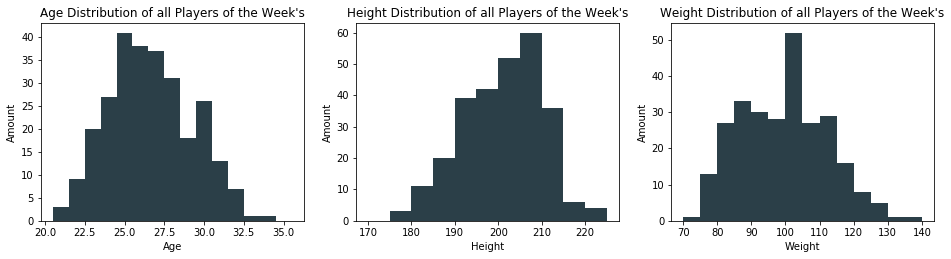

In [19]:
# plot the distributions
plt.figure(figsize= [16, 8])
subplots(df2, 1, 'Age', 20.5, 35.5, 1)
subplots(df2, 2, 'Height', 170, 225, 5)
subplots(df2, 3, 'Weight', 70, 140, 5);

## Position Distributions
Guards (G) have been awarded most of the times in the inspected time frame. Guard-forwards (GF) have been awarded the least times.

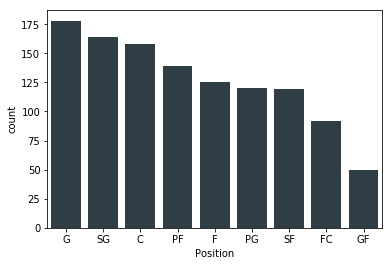

In [20]:
# Clean inconsistent Position values
df['Position'] = df['Position'].str.replace('F-C', 'FC')
df['Position'] = df['Position'].str.replace('G-F', 'GF')

# position distribution of all 
order = df['Position'].value_counts().index.values
sb.countplot(data=df, x='Position', color='#2b3f48', order=order);

<a id='bi'></a>
# II.b. Bivariate Exploration
In this step, I looked deeper into the relations between different numerical and categorical columns. I started off by feature engineering a height to weight ratio for all unique players that have been awarded with the PotW. An interesting question would be, which position had which individual features (e.g. height, weight, age) to be awarded. Is there a difference in the draft year in terms of the number of positions that have been awarded? 


## Weight to Height Relation
The Pearson Correlation Coefficient of 0.826 indicated a strong relation of weight to height. It is very useful to combine these features into one ratio for further analysis. The body mass index (bmi) ratio for each player is specified in the next step.

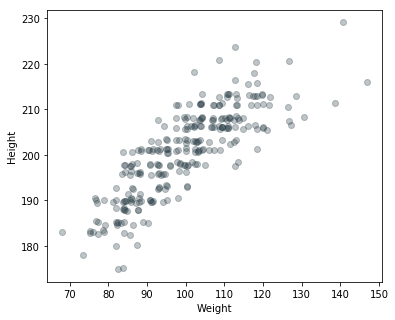

In [21]:
# Scatterplot for Weight to Height
plt.figure(figsize=[6,5])
sb.regplot(data = df2, x = 'Weight', y = 'Height', fit_reg=False,
           x_jitter = 0.5, y_jitter = 0.5, color='#2b3f48', scatter_kws = {'alpha' : 0.3});

In [22]:
# the Pearson Correlation Coefficient
np.corrcoef(df2['Weight'], df2['Height'])

array([[1.        , 0.82652989],
       [0.82652989, 1.        ]])

In [23]:
# generates the bmi
df['bmi'] = df['Weight'] / (df['Height']/100)**2
df2['bmi'] = df2['Weight'] / (df2['Height']/100)**2

## BMI by Position
setting each players bmi's in relation to their positions reveal a pattern for each position. While the median bmi for awarded Shooting-Guards (SG) is about 24, the top performing Forward-Centers (FC) have a higher middle bmi of about 26, which means that the median player has more weight per height. The bmi count is narrower and therefore wider distributed for Centers (C) and Power-Forwards (PF) than for Guards (G) or Guard-Forwards (GF).

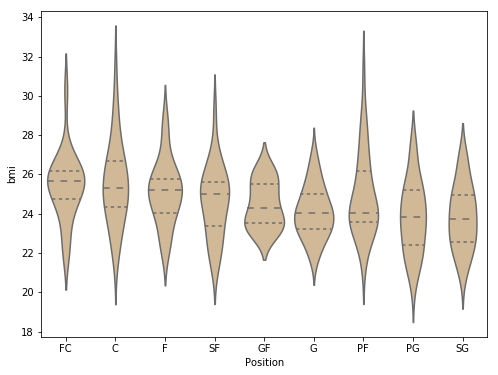

In [24]:
# Clean inconsistent Position values
df2['Position'] = df2['Position'].str.replace('F-C', 'FC')
df2['Position'] = df2['Position'].str.replace('G-F', 'GF')

# Creates a violin plot ordered by the median
orders = df2.groupby('Position')['bmi'].median().sort_values(ascending=False).index.values
plt.figure(figsize=[8,6])
sb.violinplot(data = df2, x = 'Position', y = 'bmi', order=orders, color='#dbbb8d', inner = 'quartile');

<a id='multi'></a>
# II.c. Multivariate Exploration
For this exploration part, I will add another dimension to the plots that have been shown previously, the time dimension (here in forms of `Draft Years` or `Season short` columns). Are there any changes regarding the height and weight of the PotW throughout the years? What about the bmi distributions for each Position?

## Players Weight on Height by Years
When drawing an imaginary regression line through the previous scatter plot encoded by draft years, one can see that the more recently drafted players had higher weight on height ratios (or higher bmi's), because they tend to be south of the line. An additional bmi over draft year plot should provide more insights to this trend.

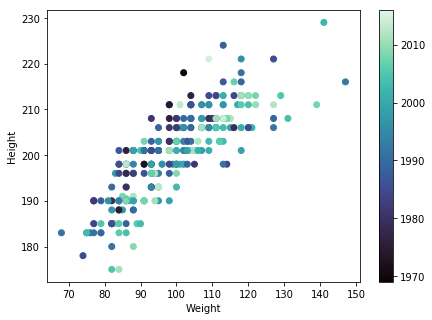

In [25]:
# creates a 3 dimensional scatter plot
plt.figure(figsize=[7,5])
plt.scatter(data = df2, x = 'Weight', y = 'Height', c = 'Draft Year', cmap='mako')
plt.colorbar()
plt.xlabel('Weight')
plt.ylabel('Height');

## Regression Line for bmi over Draft Year
The regression line shows a weak positive relation for bmi over draft years. It indicates that the top player bmi's have increased over time, meaning that they have on average gained on weight over height. This statement is in line with the previous assumption from the multivariate plot.

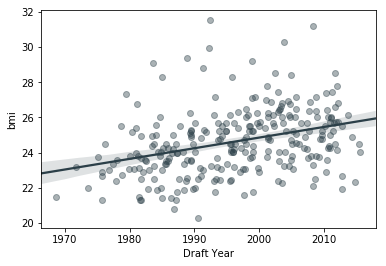

In [26]:
# creates a scatter plot with regression line
sb.regplot(data=df2, x='Draft Year', y='bmi', scatter_kws={'alpha': 0.4}, color='#2b3f48', x_jitter=1/2);

In [27]:
# Pearson Correlation Coefficient Matrice
np.corrcoef(df2['Draft Year'], df2['bmi'])

array([[1.        , 0.34386751],
       [0.34386751, 1.        ]])

## Bmi distribution for each Position over Time
How did the bmi change for each Player of the Week over the last 40-50 Years? Does the general bmi trend apply to every position?

In [28]:
# binning Draft Years into intervals
df2['draft_bin'] = ['1969-1989' if i <= 1989
                     else '1990-2009' if i <= 2009
                     else '2010-2018' for i in df2['Draft Year']]

The changes of bmi over time for each player of the week's position over time reveals some very interesting insights. Despite the overall trend of higher bmi's for the top players, the bmi of Guards (G), Centers (C), and Power-Forwards have actually decreased for players drafted after 2010. It is to note, that the position Small-Forward (SF) didn't recieve any award when drafted after 2010, and Forward-Centers (FC) didn't recieve any award when drafted after 1990.

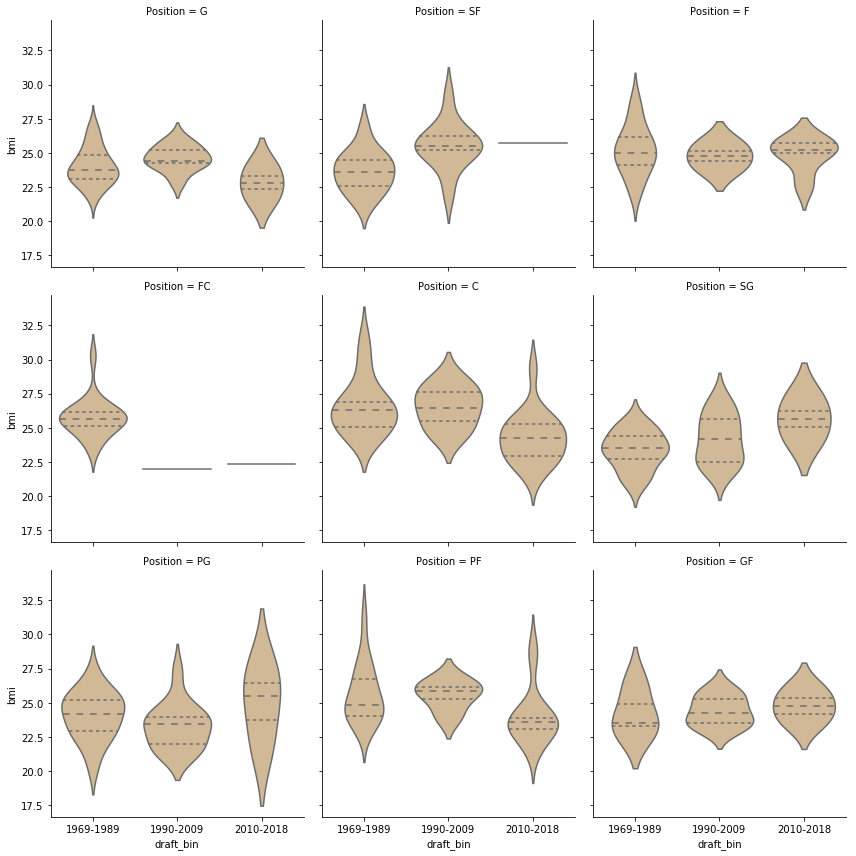

In [29]:
# Creates a facet grid with a violin plot for each position
g = sb.FacetGrid(data = df2, col = 'Position', col_wrap=3, size=4)
g.map(sb.violinplot, 'draft_bin', 'bmi', color='#dbbb8d', inner = 'quartile');